# NetworkX Tutorial

NetworkX是创建，操纵和挖掘图形最常用的Python软件包之一。

Setup

In [1]:
# Import the NetworkX package
import networkx as nx

## Graph

NetworkX提供了几个类来存储不同类型的图，比如有向图和无向图。它还提供了创建多重图(有向和无向)的类。

In [2]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

#prw
print(G.graph)

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
{}
True
{'Name': 'Bar'}


<class 'networkx.classes.graph.Graph'>


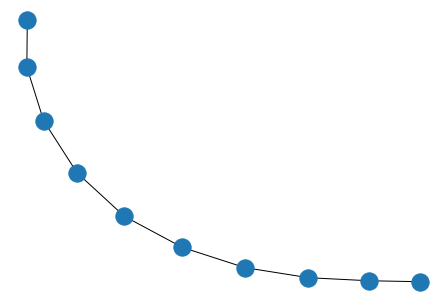

In [3]:
#PRW
H = nx.path_graph(10)
print(type(H))
nx.draw(H)

## Node

节点(带有属性)可以很容易地添加到NetworkX图中。

In [4]:
# Add one node with node level attributes
G.add_node(0, feature=0, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 0, 'label': 0}


In [5]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
])

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## Edge

与节点类似，边(带有属性)也可以很容易地添加到NetworkX图中。

In [6]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [7]:
#PRW
G.edges[0, 1]

{'weight': 0.5}

In [8]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## 可视化

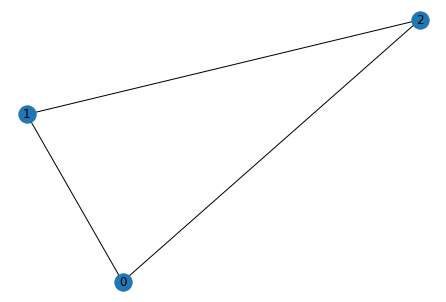

In [10]:
# Draw the graph
nx.draw(G, with_labels = True)

## 节点的度与邻居

In [11]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


## 其他功能

NetworkX还提供了大量研究图表的有用方法。

下面是一个获取节点PageRank的例子

官方文档：https://networkx.org/documentation/stable/

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

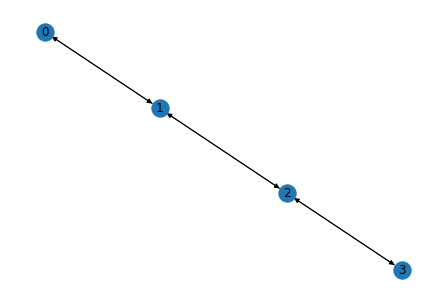

In [12]:
num_nodes = 4
# Create a new path like graph and change it to a directed graph
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

# PyTorch Geometric

PyTorch geometry (PyG)是PyTorch的扩展库。它为开发图深度学习模型提供了有用的基础，包括各种图神经网络层和大量的基准数据集。

In [1]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 1.10.1+cu113


## 可视化

In [2]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):  #is_tensor(obj): Returns True if obj is a PyTorch tensor.
        h = h.detach().cpu().numpy()
        #https://pytorch.org/docs/stable/autograd.html?highlight=detach#torch.Tensor.detach
        #pytorch .detach() .detach_() 和 .data用于切断反向传播https://blog.csdn.net/weixin_33913332/article/details/93300411
        
        #https://pytorch.org/docs/stable/tensors.html?highlight=cpu#torch.Tensor.cpu
        #cpu():Returns a copy of this object in CPU memory.
        
        #https://pytorch.org/docs/stable/tensors.html?highlight=numpy#torch.Tensor.numpy
        #Returns self tensor as a NumPy ndarray.
        
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

## 数据集
PyTorch geometry通过torch_geometry提供了对数据集的简单访问。数据集分包:

In [3]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

OSError: [WinError 127] 找不到指定的程序。